In [1]:
import torch 
from dataloader import ECG_Data, prepare_dataset
from resnet_1d import SERes1d
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn import metrics

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [3]:
number_of_channels = 12
number_of_classes = 6
final_data=prepare_dataset(r"/home/wicia/Documents/Horzyk/resnet_project/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/ptbxl_database.csv")

ECG_train,ECG_test=train_test_split(final_data,test_size=0.2,random_state=42)

ECG_test=ECG_test.reset_index()

test_dataset=ECG_Data(ECG_test, r"/home/wicia/Documents/Horzyk/resnet_project/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/")
test_loader=torch.utils.data.DataLoader(test_dataset,batch_size=64)

In [4]:
model = SERes1d(number_of_channels,number_of_classes).to(device)
model.load_state_dict(torch.load("best_SEresnet_model.pth"))
model.eval()
accuracy = 0
for data,label in test_loader :
    data = data.to(device)
    out = model(data)
    accuracy += torch.sum(torch.sigmoid(out).argmax(dim=1) == label.to(device))

accuracy = accuracy/ len(test_loader.dataset)
print(accuracy)

tensor(0.7541, device='cuda:0')


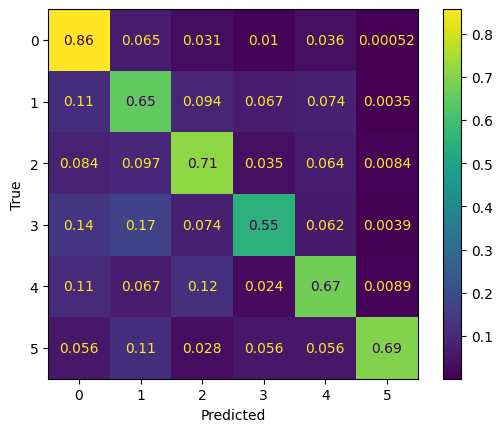

In [7]:

actual = []
predicted = []
for data,label in test_loader :
    data = data.to(device)
    out = model(data)
    actual.extend(label.numpy())
    predicted.extend(torch.sigmoid(out).argmax(dim=1).cpu().numpy())


confusion_matrix = metrics.confusion_matrix(actual, predicted,normalize="true")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2, 3, 4, 5])


cm_display.plot()
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [6]:

print(metrics.classification_report(actual, predicted))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1927
           1       0.54      0.65      0.59       566
           2       0.80      0.71      0.75      1074
           3       0.56      0.55      0.56       256
           4       0.60      0.67      0.63       449
           5       0.75      0.69      0.72        72

    accuracy                           0.75      4344
   macro avg       0.69      0.69      0.69      4344
weighted avg       0.76      0.75      0.76      4344

